# Data Exploration



Take some time exploring the data set and report what you find. Feel free to express your findings in any way you think is helpful. It may also be useful to read through Section 2 to find out what features of the data may be important.

In [1]:
# import libraries and csv file

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import time

data = pd.read_csv('data.csv')
data.head()

,class,value,distance,special
0,R,2024.01,2585,False
1,R,1931.33,2106,False
2,V,1709.99,3280,False
3,R,3406.64,2082,False
4,R,1189.01,2464,False


In [2]:
# rename class column so functions do not conflict with default class function

data.rename(columns = {'class':'truck_type'}, inplace = True)

In [3]:
# rename truck_types so charts and graphs are easier to understand

data.truck_type.replace('R', 'Reefer', inplace=True)
data.truck_type.replace('F', 'Flatbed', inplace=True)
data.truck_type.replace('V', 'Van', inplace=True)

# Data Exploration

In [4]:
# see ratios of non-numeric fields

print(data.special.value_counts())
print(data.truck_type.value_counts())


False    965
True      35
Name: special, dtype: int64
Reefer     403
Van        390
Flatbed    207
Name: truck_type, dtype: int64


In [5]:
# get percentages for each truck_type

truck_type_counts = data.truck_type.value_counts()

reefer_percent = round(truck_type_counts['Reefer'] / data.shape[0], 2)
van_percent = round(truck_type_counts['Van'] / data.shape[0], 2)
flatbed_percent = round(truck_type_counts['Flatbed'] / data.shape[0], 2)

print(reefer_percent)
print(van_percent)
print(flatbed_percent)
print(reefer_percent+van_percent+flatbed_percent)

0.4
0.39
0.21
1.0


Comments:

- special truck types are not common.

- the truck_types are relatively mixed.

Text(0.5, 1.0, 'Distance vs Value')

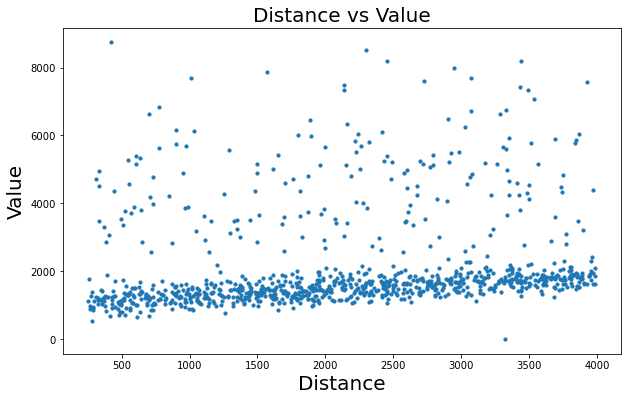

In [6]:
# see correlation between distance and value

plt.figure(figsize=(10,6))
plt.scatter(data.distance, 
            data.value,
            s=10)
            # c=data.species.astype('category').cat.codes
plt.xlabel("Distance", size=20)
plt.ylabel("Value", size=20)
plt.title('Distance vs Value', size=20)


Comments:

- there is a clear trend between distance vs value for most loads
- there are value outliers present at all distances

Open Question:
- what is the source of outlier value loads?

Next steps: 
- See if any fields correlate to the higher values

Text(0.5, 1.0, 'Distance vs Value')

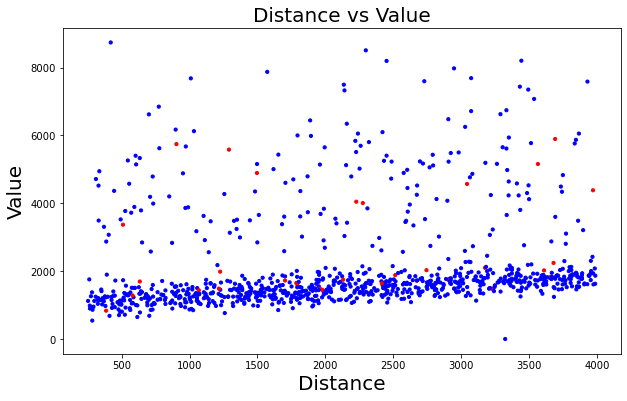

In [7]:
# see if special truck loads affect cost

colors = ['r' if special==True else 'b' for special in data.special]

plt.figure(figsize=(10,6))
scatter = plt.scatter(data.distance, 
            data.value,
            s=10,
            c=colors)
plt.xlabel("Distance", size=20)
plt.ylabel("Value", size=20)
plt.title('Distance vs Value', size=20)
# plt.legend(scatter.legend_elements()[0], 
#            labels=data.special,
#            title="special")

Comments:

- not much of correlation between special truck loads and value/distance

Next steps:
- try truck type

Text(0.5, 1.0, 'Distance vs Value')

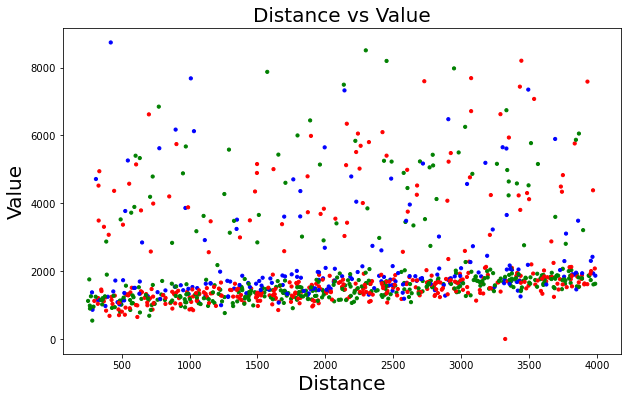

In [8]:
# see correlation between distance and value

colors = ['g' if truck_type=='Reefer' else 'r' if truck_type=='Van' else 'b' for truck_type in data.truck_type]

plt.figure(figsize=(10,6))
scatter = plt.scatter(data.distance, 
            data.value,
            s=10,
            c=colors)
plt.xlabel("Distance", size=20)
plt.ylabel("Value", size=20)
plt.title('Distance vs Value', size=20)

Conclusion:
- outlier values for distances is not distinguishable purely based off one column field


Next steps:

- review distribution of features by truck_type

In [ ]:
# distribution chart

In [17]:
data.to_csv('Cleaned_Data.csv', index = False)